# Mall Customer Segmentation Analysis

This notebook aims to analyze the Mall Customer data to understand the customer segments using clustering techniques.


## Importing Libraries


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data


In [1]:
file_path = 'data/Mall_Customers.csv'
mall_customers_df = pd.read_csv(file_path)


In [2]:
mall_customers_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Preprocessing

In [16]:
missing_values = mall_customers_df.isnull().sum()
missing_values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Cluster                   0
dtype: int64

In [17]:
duplicate_rows = mall_customers_df[mall_customers_df.duplicated()]
duplicate_rows

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster


## Exploratory Data Analysis


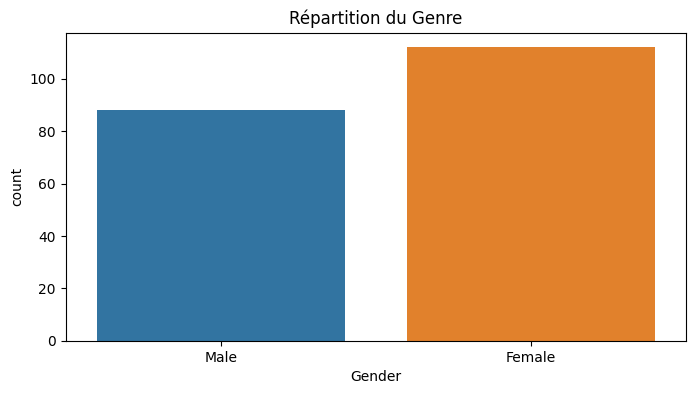

In [5]:
# Répartition du genre
plt.figure(figsize=(8, 4))
sns.countplot(x='Gender', data=mall_customers_df)
plt.title('Répartition du Genre')
plt.show()

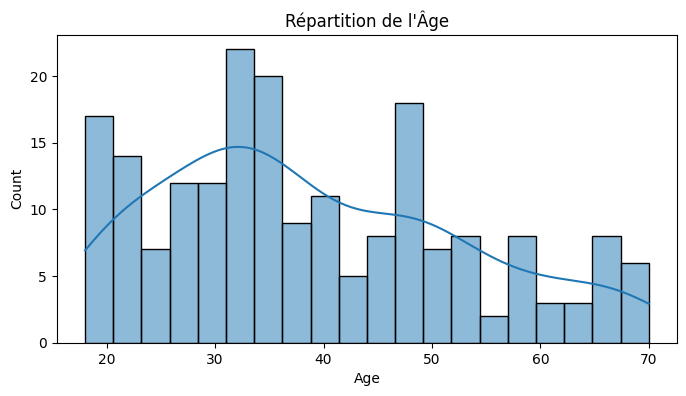

In [6]:
# Répartition de l'âge
plt.figure(figsize=(8, 4))
sns.histplot(mall_customers_df['Age'], kde=True, bins=20)
plt.title('Répartition de l\'Âge')
plt.show()

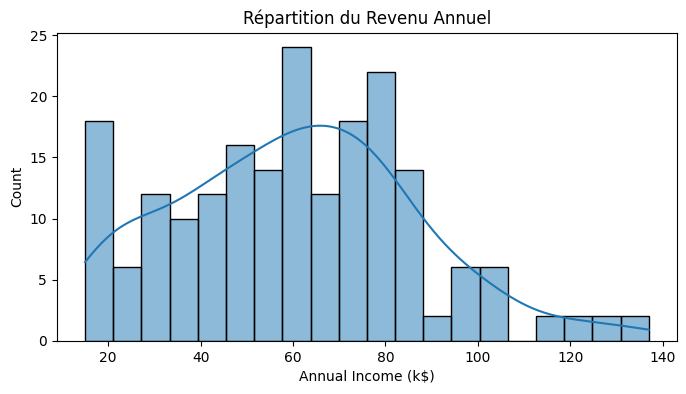

In [7]:
# Répartition du revenu annuel
plt.figure(figsize=(8, 4))
sns.histplot(mall_customers_df['Annual Income (k$)'], kde=True, bins=20)
plt.title('Répartition du Revenu Annuel')
plt.show()

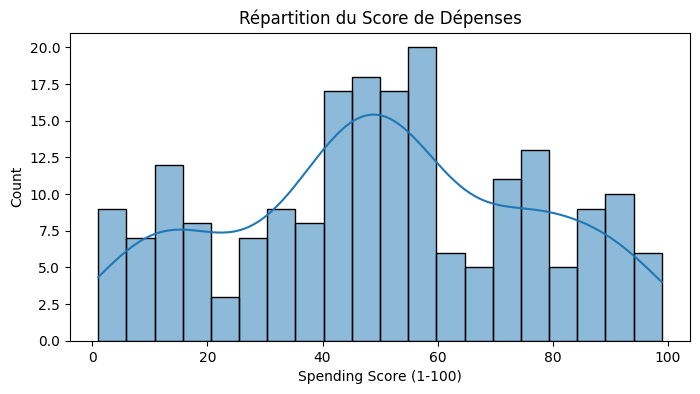

In [8]:
# Répartition du score de dépenses
plt.figure(figsize=(8, 4))
sns.histplot(mall_customers_df['Spending Score (1-100)'], kde=True, bins=20)
plt.title('Répartition du Score de Dépenses')
plt.show()

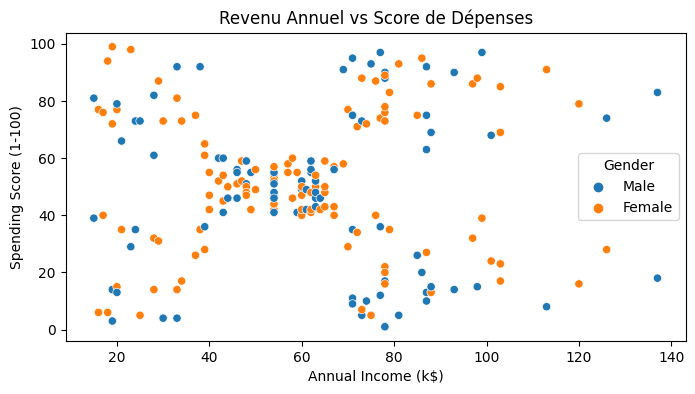

In [9]:
# Relation entre revenu annuel et score de dépenses
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=mall_customers_df)
plt.title('Revenu Annuel vs Score de Dépenses')
plt.show()

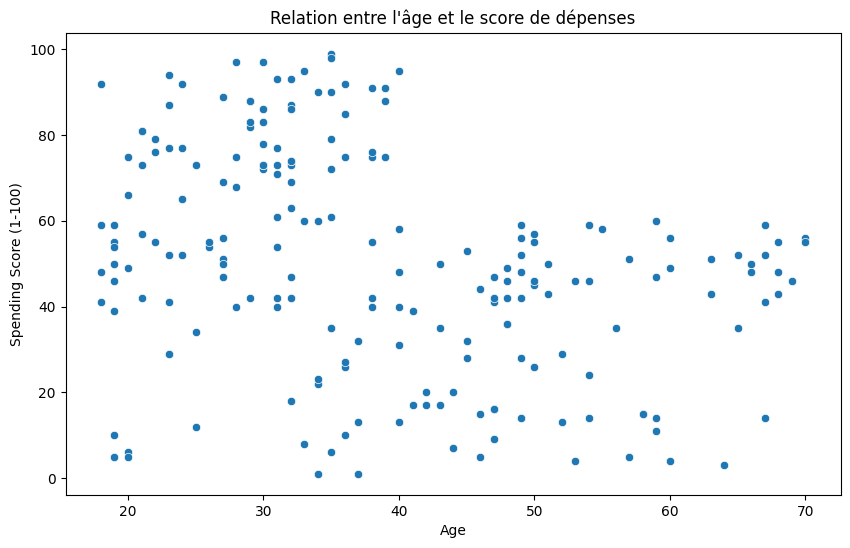

In [19]:
# Visualiser la relation entre l'âge et le score de dépenses
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=mall_customers_df)
plt.title('Relation entre l\'âge et le score de dépenses')
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

# Sélection des variables pertinentes
features = mall_customers_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Normalisation des données
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Affichage des premières lignes des données normalisées
scaled_features[:5]

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992]])

In [ ]:
from sklearn.cluster import KMeans

# Calcul des distortions pour différents nombres de clusters
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    distortions.append(kmeans.inertia_)

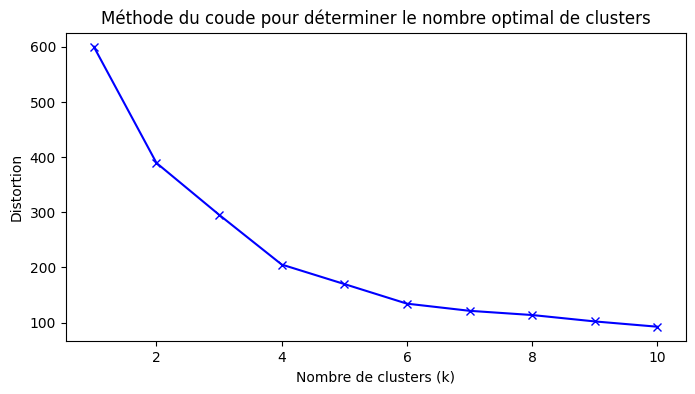

In [11]:
# Visualisation de la méthode du coude
plt.figure(figsize=(8, 4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Distortion')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.show()

In [ ]:
# Application de K-means avec k = 4
kmeans = KMeans(n_clusters=4, random_state=42)
mall_customers_df['Cluster'] = kmeans.fit_predict(scaled_features)

# Ajout des centres des clusters pour visualisation
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

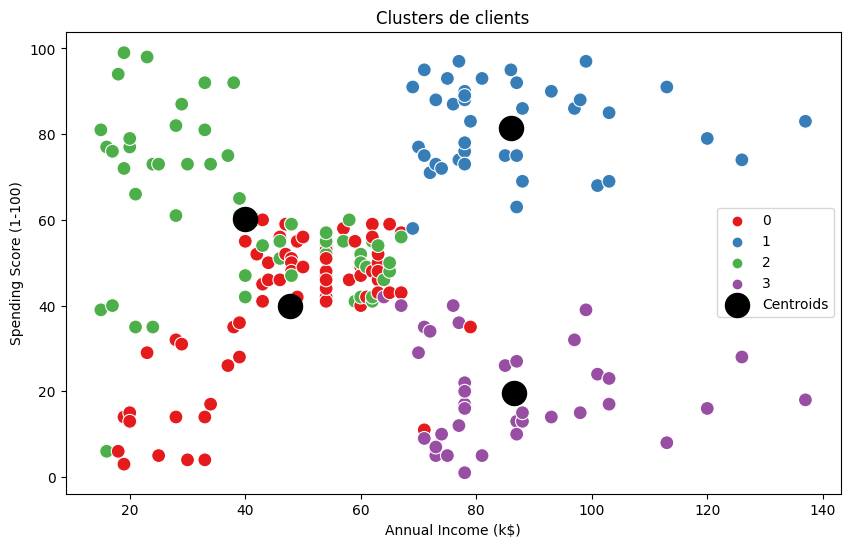

,Age,Annual Income (k$),Spending Score (1-100)
0,53.984615,47.707692,39.969231
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,39.368421,86.500000,19.578947


In [15]:
# Visualisation des clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=mall_customers_df, palette='Set1', s=100)
plt.scatter(cluster_centers[:, 1], cluster_centers[:, 2], s=300, c='black', label='Centroids')
plt.title('Clusters de clients')
plt.legend()
plt.show()

# Affichage des centres des clusters
cluster_centers_df

In [20]:
cluster_profiles = mall_customers_df.groupby('Cluster').mean()
cluster_profiles

/var/folders/rt/0hb6rtq14291d__lx9m1jbd00000gn/T/ipykernel_14277/4019043590.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_profiles = mall_customers_df.groupby('Cluster').mean()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,69.415385,53.984615,47.707692,39.969231
1,161.025000,32.875000,86.100000,81.525000
2,53.438596,25.438596,40.000000,60.298246
3,160.552632,39.368421,86.500000,19.578947


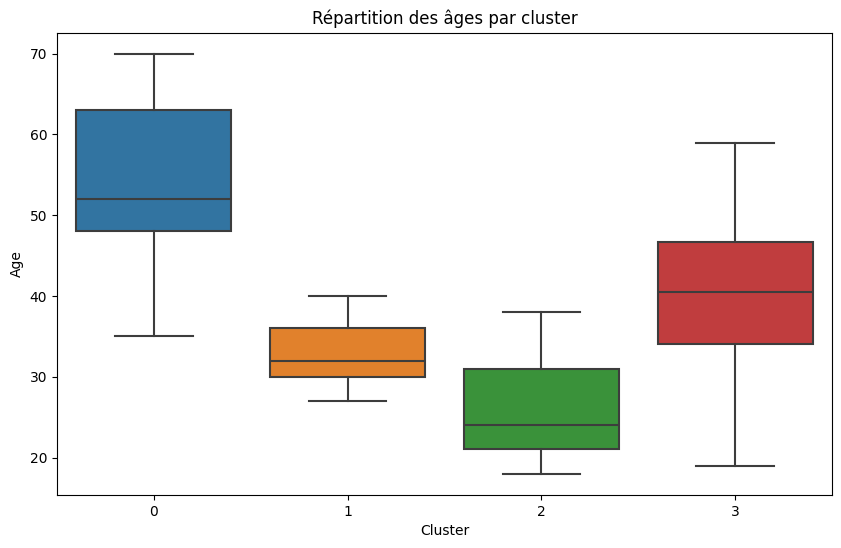

In [22]:
# Visualiser les clusters selon l'âge
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Age', data=mall_customers_df)
plt.title('Répartition des âges par cluster')
plt.show()

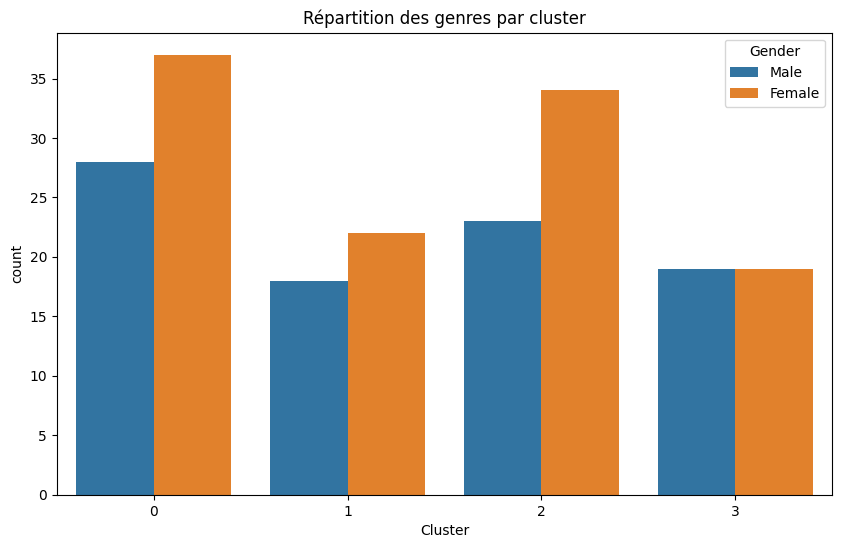

In [23]:
# Visualiser les clusters selon le genre
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='Gender', data=mall_customers_df)
plt.title('Répartition des genres par cluster')
plt.show()

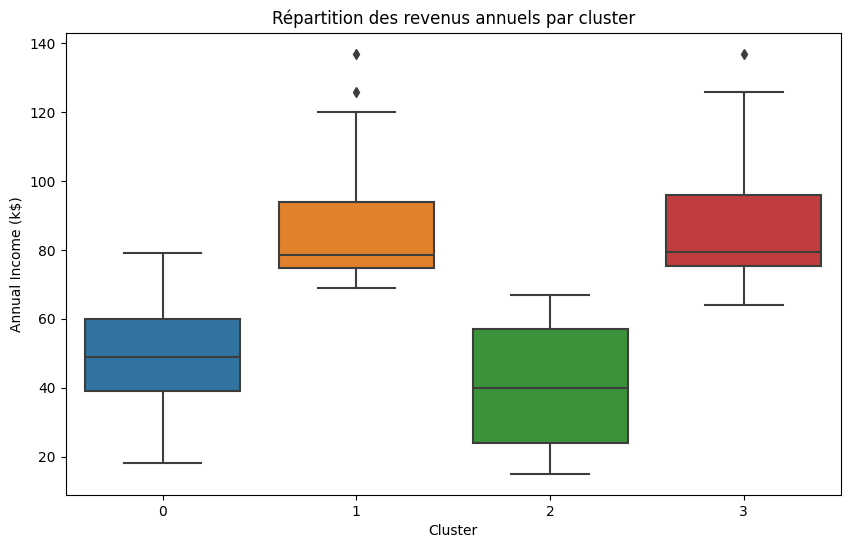

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=mall_customers_df)
plt.title('Répartition des revenus annuels par cluster')
plt.show()